In [1]:
from __future__ import print_function
from datahandling import access_db
from data_processing_pipeline import equip_dtypes_for_scoring
from tinydb import Query, TinyDB
from matplotlib.pyplot import plot, figure, ylim, xlim, ylabel, xlabel
from model_analysis import translate_model_code
from numpy import argmax
from no_big_db_func import get_all_names
from pandas import DataFrame
% matplotlib inline

C:\Users\Reinhard\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
names = get_all_names()

In [15]:
sm_db = access_db(3, True)

C:\Users\Reinhard\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


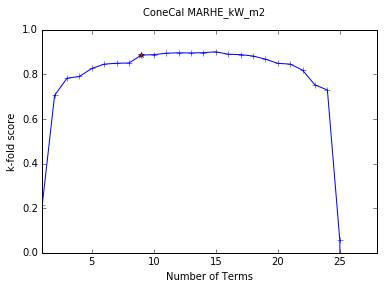

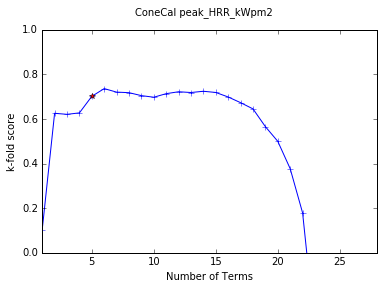

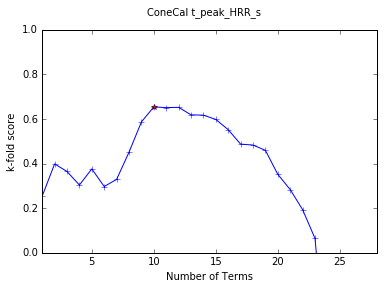

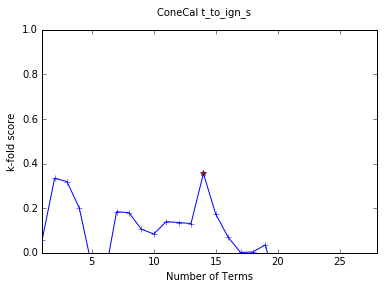

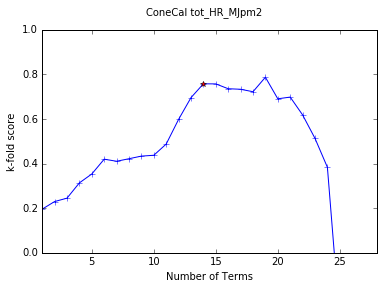

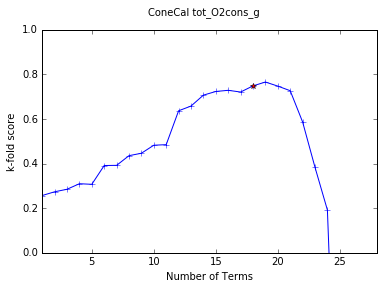

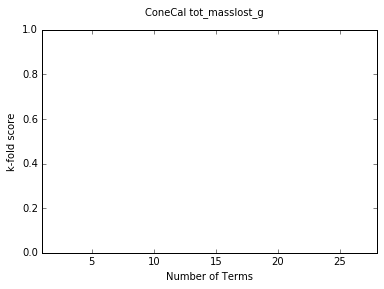

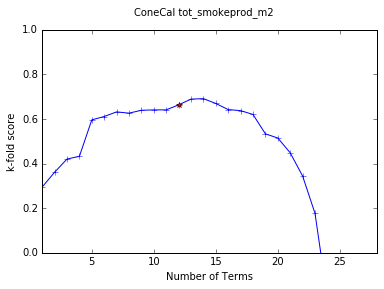

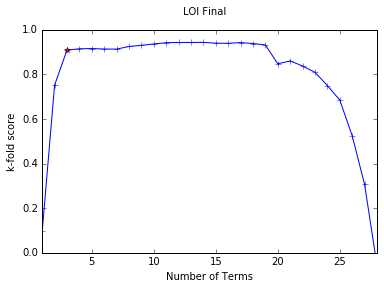

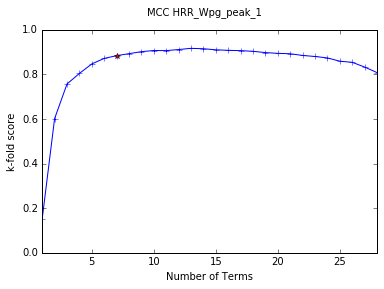

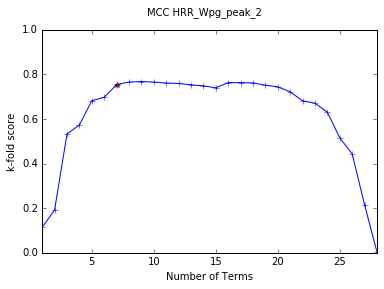

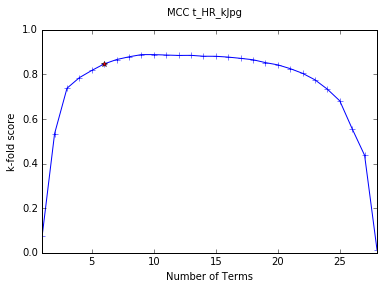

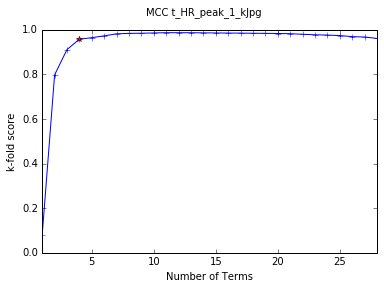

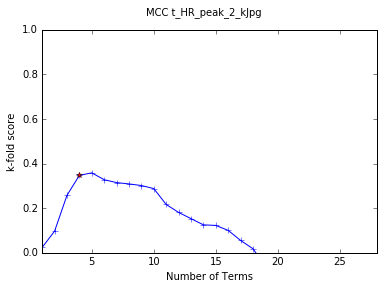

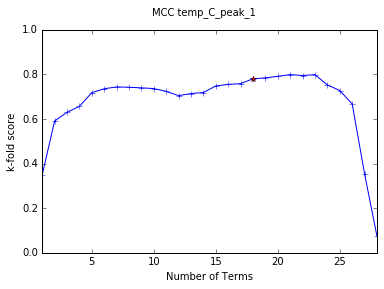

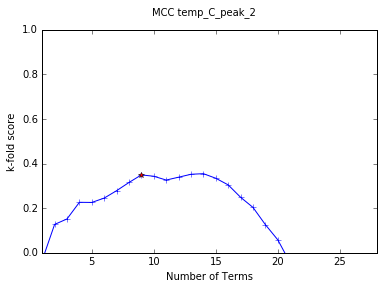

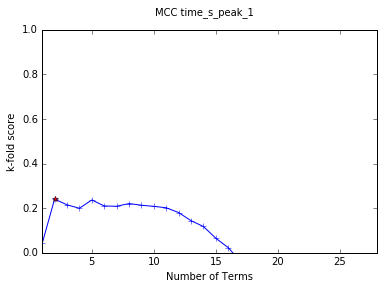

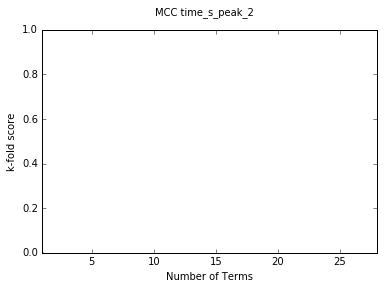

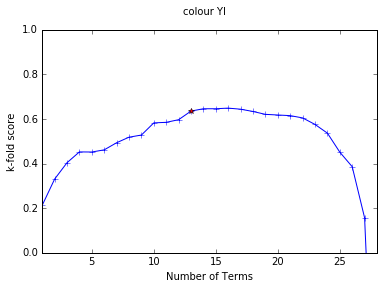

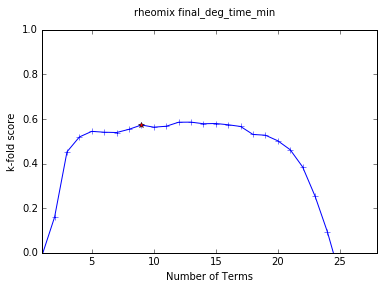

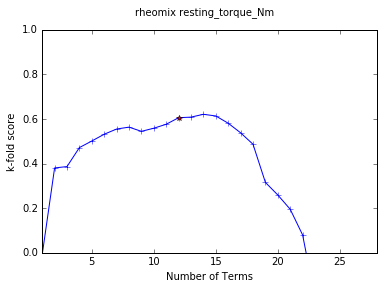

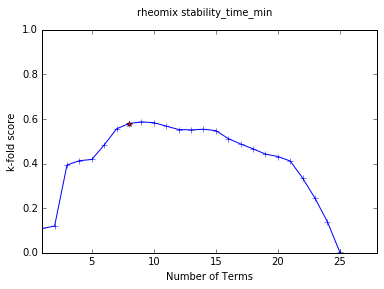

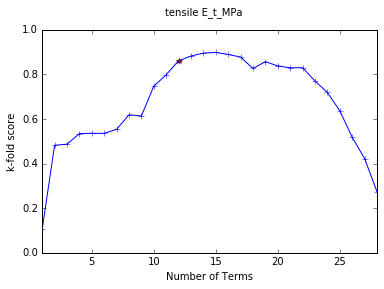

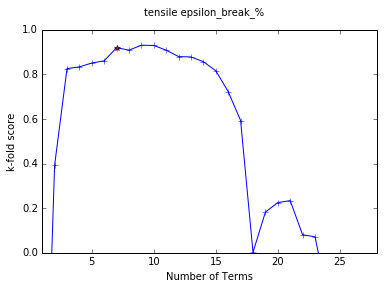

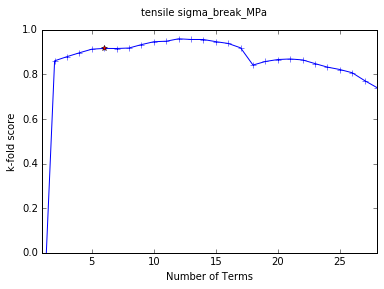

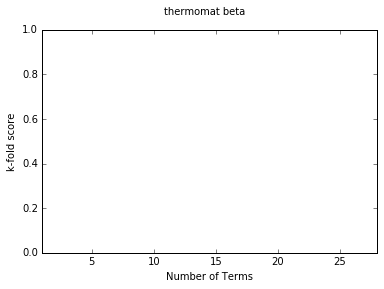

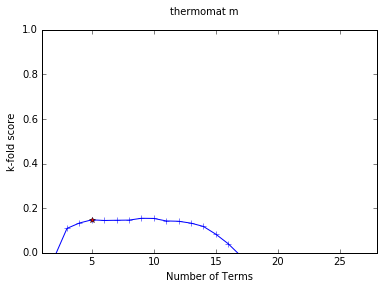

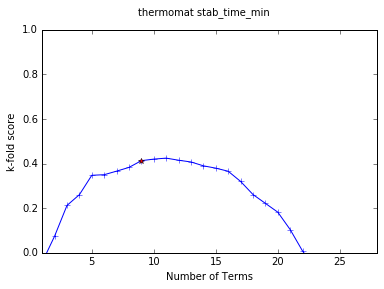

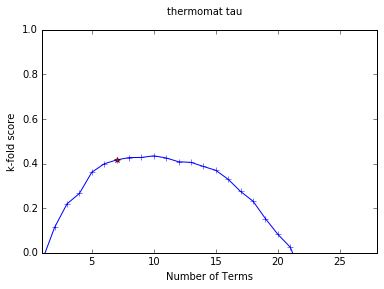

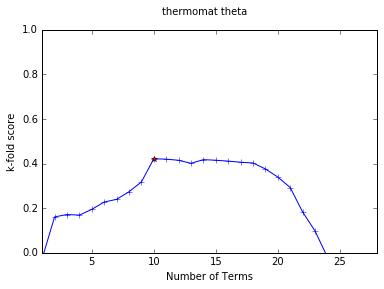

In [22]:
Q = Query()
use_lim = True

for i in names:
    equip, d_type = i.split(' ')
    
    top_db = access_db('Top_score_results_'+ equip + '_' + d_type, False)
               
    df = DataFrame(top_db.all())
    
    n_terms = list(df['n_terms'].values)
    scores = list(df['top_score'].values)
    mcodes = list(df['top_mcode'].values)
    
    entry = sm_db.search((Q.equipment_name == equip) & (Q.data_type == d_type))
    select_mcode = entry[0]['select_mcode']
    select_score = entry[0]['select_score']
    
    fig = figure()
    plot(n_terms, scores, '-+')
    ylim([0.0, 1.0])
    ylabel('k-fold score')
    xlim([1.0, 28.0])
    xlabel('Number of Terms')
    
    plot(len(select_mcode), select_score, 'r*')
    
    fig.suptitle(i)
